In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path='ex2data1.txt'
data=pd.read_csv(path,names=['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


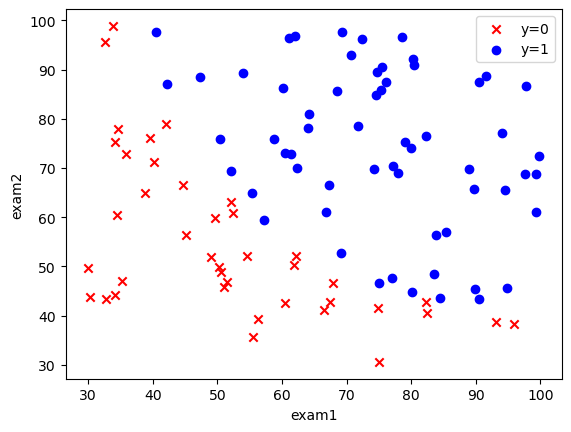

In [4]:
fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [5]:
def get_Xy(data):
    
    data.insert(0,'ones',1)
    X_=data.iloc[:,0:-1]
    X=X_.values
    
    y_=data.iloc[:,-1]
    y=y_.values.reshape(len(y_),1)
    
    return X,y

In [6]:
X,y=get_Xy(data)

In [7]:
X.shape

(100, 3)

In [8]:
y.shape

(100, 1)

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def costFunction(X,y,theta):
    
    A=sigmoid(X@theta)
    
    first=y*np.log(A)
    second=(1-y)*np.log(1-A)
    
    return -np.sum(first+second)/len(X)

In [11]:
theta=np.zeros((3,1))
theta.shape

(3, 1)

In [12]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [13]:
def gradientDescent(X,y,theta,alpha,iters):
    m=len(X)
    costs=[]
    
    for i in range(iters):
        theta=theta-X.T@(sigmoid(X@theta)-y)*alpha/m
        cost=costFunction(X,y,theta)
        costs.append(cost)
        if i%1000==0:
            print(cost)
    return costs,theta

In [14]:
alpha=0.004
iters=200000

In [16]:
costs,theta_final=gradientDescent(X,y,theta,alpha,iters)

1.988653857893008
3.078170019864155
5.487009635362496
1.8519433661332634
2.955128942408359
5.438688730769618
1.8046128090728504
2.8312715776074047
5.3886531633606145
1.7561538117121558
2.706676380747814
5.3365673644957425
1.7062807047694803
2.581850851905427
5.281774101800353
1.6544129958512044
2.4578430947435774
5.223255119969365
1.5996612097145562
2.3362477519414644
5.159653459570274
1.5408871901849082
2.2190492038468905
5.089387088751128
1.4768567851081478
2.108268509053651
5.010845104587983
1.4064493632805855
2.005433890383272
4.9225734611717336
1.3288041261254449
1.9109646054893654
4.823257484826611
1.2432202250971682
1.82358661215214
4.711246821296763
1.1486277932139566
1.7397667362447995
4.583257400457349
1.042347830600668
1.6525865746034036
4.430932868329269
0.9166267386002189
1.5465331276550842
4.224624720512681
0.7330944584991158
3.892092635050367
0.6587030517597924
0.5171612492856659
0.5265817260757523
0.24677888164957668
1.1760334011243005
0.2575489729486098
2.8864762106482

In [17]:
theta_final

array([[-23.77288372],
       [  0.20687383],
       [  0.19997746]])

In [21]:
def predict(X,theta):
    prob=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [22]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)

acc = np.mean(y_pre==y)

print(acc)

0.91


In [18]:
coef1=-theta_final[0,0]/theta_final[2,0]
coef2=-theta_final[1,0]/theta_final[2,0]

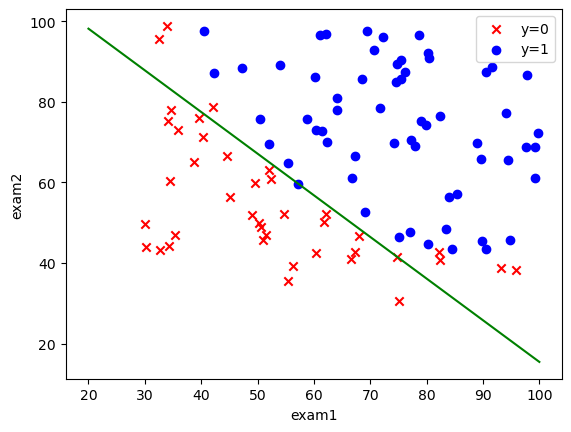

In [20]:
x=np.linspace(20,100,100)
f=coef1+coef2*x

fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
ax.plot(x,f,c='g')
plt.show()